**Predict the forex(USD) trend from Fubon Bank** 

This project is a reference to this [website](https://pythondata.com/forecasting-time-series-autoregression/)

**Install statesmodels for Autoregression Model**

In [11]:
!pip3 install statsmodels

  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)


In [1]:
import pandas
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

**Get the data from the website**

The attributes are [time], [bank buying price], [bank selling price]

In [2]:
    # six months USD exchange rate trend
    url = 'https://www.fubon.com/Fubon_Portal/banking/Personal/deposit/exchange_rate/exchange_rate1_photo.jsp?urlParameter=6M&currency=USD'
    pd = pandas.read_html(url)
    print(pd)

[             時間     銀行買入     銀行賣出
0    2021/09/28  27.7310  27.8310
1    2021/09/27  27.6660  27.7660
2    2021/09/24  27.6710  27.7710
3    2021/09/23  27.7140  27.8140
4    2021/09/22  27.7225  27.8225
..          ...      ...      ...
121  2021/04/07  28.3725  28.4725
122  2021/04/06  28.4335  28.5335
123  2021/04/01  28.4725  28.5725
124  2021/03/31  28.4830  28.5830
125  2021/03/30  28.4605  28.5605

[126 rows x 3 columns]]


**Prepare for the dataset**

1.   Convert two columns in a table into two separate lists
2.   Use matplotlib to print two data trends

Seperate the two columns([bank buying price], [bank selling price]) into two lists

*   buyList
*   sellList



In [3]:
currency = pd[0] 
buyList = []
sellList = []
buyList = currency[:][['銀行買入']].values
sellList = currency[:][['銀行賣出']].values

You can tell the trend line from **buying price**

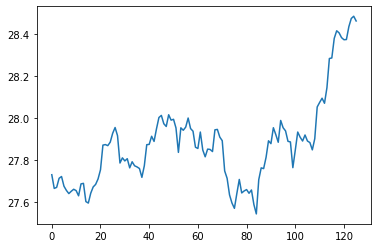

In [5]:
plt.plot(buyList)
plt.show()

You can tell the trend line from **selling price**

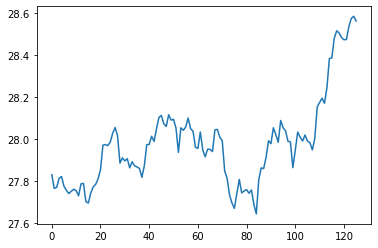

In [6]:
plt.plot(sellList)
plt.show()

**Train Autoregressive Model**

1.   Train autoregressive model with buying-price data
2.   Train autoregressive model with buying-price data



In [8]:
data = buyList
model = AutoReg(data, lags=1)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [10]:
yhat = model_fit.predict(len(data), len(data))
print("The buying-price prediction:")
print(yhat)

The buying-price prediction:
[28.46346804]


In [11]:
data = sellList
model = AutoReg(data, lags=1)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [12]:
yhat = model_fit.predict(len(data), len(data))
print("The selling-price prediction:")
print(yhat)

The selling-price prediction:
[28.56346804]
